## Import libraries

In [1]:
#Modules related to dataframe manipulation
import pandas as pd
import numpy as np
#Modules related to plot
from matplotlib import pyplot as plt
import seaborn as sns
#Modules related to ML
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
#Modules for text preprocessing
import nltk
import spacy
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#Downloading stopwords and punctuation
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to C:\Users\Balachandru
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Balachandru
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Balachandru
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## Data Preparation

In [2]:
# Read input (training) data
ecommerce_df = pd.read_csv("train_product_data.csv")
ecommerce_df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."


In [3]:
# Check all the metadata about the data
ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  14999 non-null  object 
 1   crawl_timestamp          14999 non-null  object 
 2   product_url              14999 non-null  object 
 3   product_name             14999 non-null  object 
 4   product_category_tree    14999 non-null  object 
 5   pid                      14999 non-null  object 
 6   retail_price             14942 non-null  float64
 7   discounted_price         14942 non-null  float64
 8   image                    14996 non-null  object 
 9   is_FK_Advantage_product  14999 non-null  bool   
 10  description              14998 non-null  object 
 11  product_rating           14999 non-null  object 
 12  overall_rating           14999 non-null  object 
 13  brand                    10289 non-null  object 
 14  product_specifications

In [4]:
# Check summary statistics for numerical fields
ecommerce_df.describe()

,retail_price,discounted_price
count,14942.000000,14942.000000
mean,3128.424040,2087.732298
std,9154.463342,7712.247869
min,35.000000,35.000000
25%,699.000000,349.000000
50%,1000.000000,499.000000
75%,1989.750000,999.000000
max,571230.000000,571230.000000


In [5]:
# Check summary statistics for numerical fields
ecommerce_df.describe(include=object)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,image,description,product_rating,overall_rating,brand,product_specifications
count,14999,14999,14999,14999,14999,14999,14996,14998,14999,14999,10289,14993
unique,14999,246,14999,9345,14,14997,13762,13163,36,36,2311,14082
top,d6eff0e0c938cc39c4451083994a2227,2015-12-01 12:40:44 +0000,http://www.flipkart.com/kenway-retail-brass-co...,S4S Stylish Women's Push-up Bra,Clothing,ACCEJ6TESY7AFT5W,"[""http://img6a.flixcart.com/image/car-mat/m/t/...",Fashion Jewellery Alloy Necklace - Buy Fashion...,No rating available,No rating available,Allure Auto,"{""product_specification""=>[{""key""=>""Type"", ""va..."
freq,1,1960,1,94,5316,2,45,38,13520,13520,469,71


## Exploratory Data Analysis

In [6]:
#Check the target values count details
ecommerce_df['product_category_tree'].value_counts()

product_category_tree
Clothing                       5316
Jewellery                      3218
Footwear                       1083
Automotive                      937
Mobiles & Accessories           768
Home Decor & Festive Needs      714
Kitchen & Dining                610
Computers                       531
Watches                         526
Tools & Hardware                379
Toys & School Supplies          271
Pens & Stationery               264
Baby Care                       224
Bags, Wallets & Belts           158
Name: count, dtype: int64

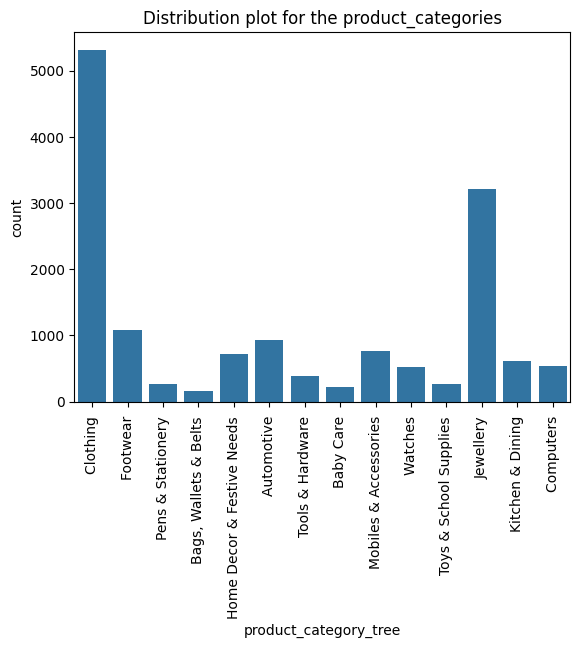

In [7]:
#Distribution plot for the product_categories
sns.countplot(x=ecommerce_df['product_category_tree'])
plt.title('Distribution plot for the product_categories')
plt.xticks(rotation=90)
plt.show()

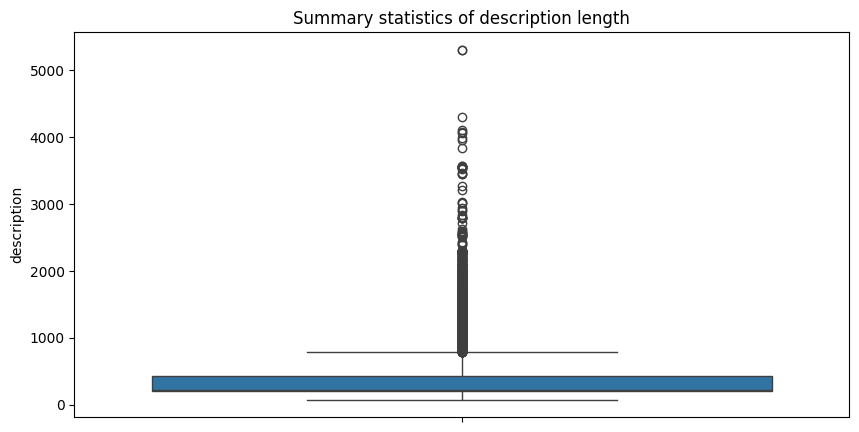

In [8]:
#Summary statistics about the input description length
plt.figure(figsize=(10,5))
desc_len = ecommerce_df.description.str.len()
sns.boxplot(y=desc_len, fill=True)
plt.title("Summary statistics of description length")
plt.show()

In [9]:
#Fetch the brand names with count more than 30
brand_count_details = ecommerce_df['brand'].value_counts().reset_index()
brand_count_details_filtered = brand_count_details[brand_count_details['count']>30]
top_ten_brand = brand_count_details_filtered[0:10]
top_ten_brand

,brand,count
0,Allure Auto,469
1,Regular,312
2,Slim,288
3,Voylla,273
4,Karatcraft,211
5,Black,164
6,White,154
7,DailyObjects,144
8,Radiant Bay,132
9,Speedwav,112


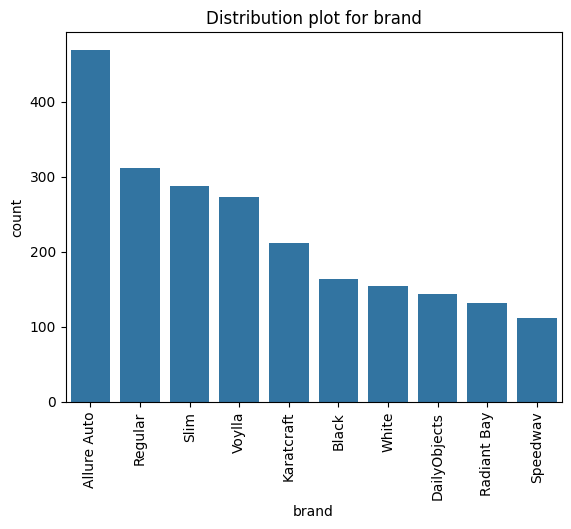

In [10]:
#Distribution plot for brand with count more than 20
sns.barplot(x=top_ten_brand['brand'],y=top_ten_brand['count'])
plt.xticks(rotation=90)
plt.title('Distribution plot for brand')
plt.show()

## Missing Data Handling

In [11]:
#Here the target variable "product_category_tree" has 0 missing value and the description input variable is having one missing value.
ecommerce_df.isna().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 57
discounted_price             57
image                         3
is_FK_Advantage_product       0
description                   1
product_rating                0
overall_rating                0
brand                      4710
product_specifications        6
dtype: int64

In [12]:
#Since the description has only 1 missing value out of 14999, we can good to remove. If it has more good to replace with most frequent value
print('Before droppging the shape of dataframe', ecommerce_df.shape)
ecommerce_df = ecommerce_df.dropna(subset=['description'])
print('After droppging the shape of dataframe', ecommerce_df.shape)

Before droppging the shape of dataframe (14999, 15)
After droppging the shape of dataframe (14998, 15)


## Balancing input data

In [13]:
# Initialize RandomOverSampler
x_train = ecommerce_df.drop('product_category_tree', axis=1)
y_train = ecommerce_df['product_category_tree']
ros = RandomOverSampler(random_state=42)

# Apply oversampling to the training data (X_train, y_train)
x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)
print('Updated value counts', y_train_resampled.value_counts())
print('X training dataset shape', x_train_resampled.shape)
print('Y training dataset shape', y_train_resampled.shape)

Updated value counts product_category_tree
Clothing                       5315
Footwear                       5315
Pens & Stationery              5315
Bags, Wallets & Belts          5315
Home Decor & Festive Needs     5315
Automotive                     5315
Tools & Hardware               5315
Baby Care                      5315
Mobiles & Accessories          5315
Watches                        5315
Toys & School Supplies         5315
Jewellery                      5315
Kitchen & Dining               5315
Computers                      5315
Name: count, dtype: int64
X training dataset shape (74410, 14)
Y training dataset shape (74410,)


## Text Preprocessing

In [14]:
#Find product descriptio  with max count
max_len = max(x_train.description.str.len())
index = 0
for desc in x_train.description:
    index = index + 1
    if len(desc) == max_len:
        desc_with_max_len = desc
        break
print('Desc with max length value', x_train.description[index-1])
#print('index value', index)

Desc with max length value Asian Gems & Jewels 6.25 Ratti 5 Dhaatu Sterling Silver, Metal, Alloy Cat's Eye NA K Ring
                         Price: Rs. 828
				
			Asian Gem & Jewellery offers you Panch dhaatu Cultured Gemstone Finger Ring . 'ASIAN GEMS & JEWELS' and all its grading standards and content (Copyright Registered)
 belongs to the Owners of NEW INDIA WORKS (NIW).
In Hindi, '9' means 'Nav' and '5' means 'Punch'. Gem is called 'Ratna', whereas any 'Metal or Mineral or Element' is referred as 'Dhaatu'.
Regarding 9 Gemstones. 'Nav Ratnas' means an 'Astro Planetary' communicating team of 9 Precious and Semi Precious Gemstones those are believed to reach and connect out to 9 Planets residing, revolving in our galaxy. 
In the Birth Horoscope of an individual, if any planet is weak or some other planets are not sitting in the right degree/position or house or are opposing or suppressing some other planets than :-
RUBY (MANIK) is considered to connect, enhance and empower Planet Su

In [15]:
# Initialize the stop words, stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
def preprocess_text(text):
    # Step 1: Lowercase
    text = text.lower()
    # Step 2: Replace digits
    text = re.sub(r'[^\w\d\s]', '', text)
    text = re.sub(r'\d', '', text)
    # Step 3: Remove punctuation
    text = text.translate(str.maketrans("","", string.punctuation))
    # Step 4: Tokenization
    tokens = word_tokenize(text)
    # Step 5: Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Step 6: Stemming
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

    return " ".join(stemmed_tokens)

x_train['description'] = x_train['description'].apply(preprocess_text)
print(preprocess_text(x_train.description[index-1]))

asian gem jewel ratti dhaatu sterl silver metal alloy cat eye na k ring price rs asian gem jewelleri offer panch dhaatu cultur gemston finger ring asian gem jewel grade standard content copyright regist belong owner new india work niw hindi mean nav mean punch gem call ratna wherea metal miner element refer dhaatu regard gemston nav ratna mean astro planetari commun team preciou semi preciou gemston believ reach connect planet resid revolv galaxi birth horoscop individu planet weak planet sit right degreeposit hou oppo suppress planet rubi manik consid connect enhanc empow planet sun surya blue sapphir neelam consid connect enhanc empow planet saturn shani yellow sapphir pukhraj consid connect enhanc empow planet jupit guru coral moonga consid connect enhanc empow planet mar moonga emerald panna consid connect enhanc empow planet mercuri budh pearl moti consid connect enhanc empow planet moon chandra hessonit gomedh consid connect enhanc empow invi planet rahu cat eye lehsuniya consid 

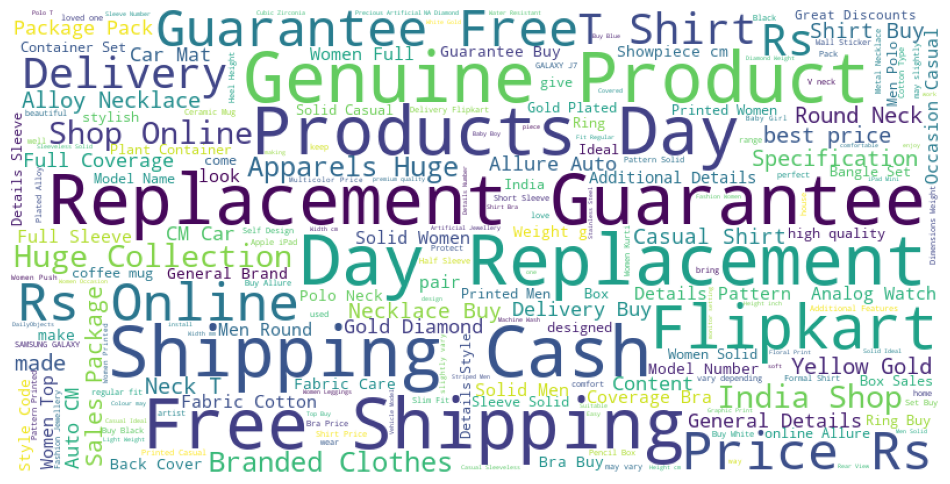

In [16]:
# Wordcloud plot to know max distributed value
wordcloud = WordCloud(background_color='white', width=800, height=400).generate("".join(ecommerce_df['description']))
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [17]:
# Remove domain oriented keywords to focus on the product description
def remove_domain_keys(text):

    domain_keyswords = ['ship', 'flipkart', 'flipkartcom', 'replacement', 'free', 'price', 'sale', 'day', 'guarante', 'india', 'replace', 
                        'replac', 'deliveri', 'collect', 'online', 'onlin', 'shop', 'genuin', 'brand', 'product', 'cash', 'cashbuy', 'rs', 'buy', 'pack', 'backag', 'content', 'number']
    # Step 1: Tokenization
    tokens = word_tokenize(text)
    # Step 2: Remove stopwords
    filtered_tokens = [word for word in tokens if word not in domain_keyswords]
    
    return " ".join(filtered_tokens)

x_train['description'] = x_train['description'].apply(remove_domain_keys)

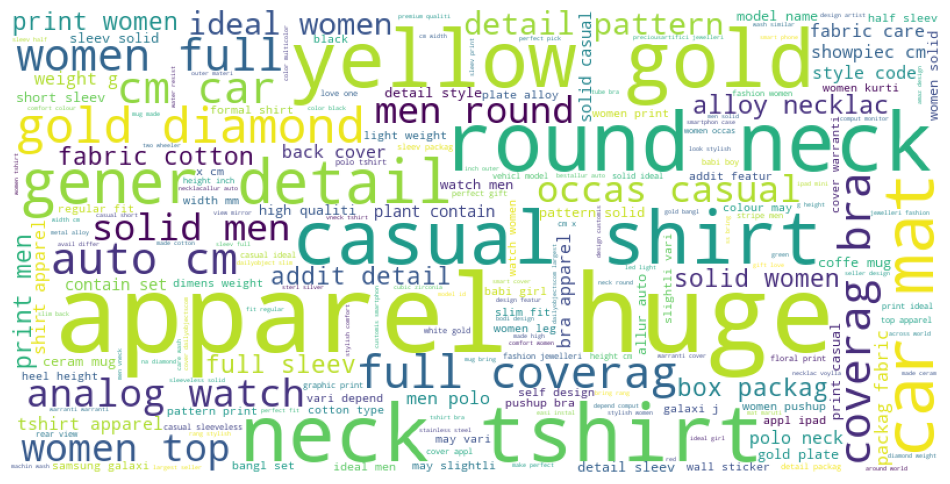

In [18]:
# Wordcloud plot to know max distributed value after replacing domain-oriented keywords
wordcloud = WordCloud(background_color='white', width=800, height=400).generate("".join(x_train['description']))
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Feature Engineering

In [19]:
# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the text data
vectorizer.fit(x_train['description'])
x_train = vectorizer.transform(x_train['description']).toarray()

In [20]:
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)

## Preparing Testdata

In [21]:
# Read test data
x_test = pd.read_csv("test_data.csv")
y_test = pd.read_csv("test_results.csv")
# Preprocess test data
x_test['description'] = x_test['description'].apply(preprocess_text)
x_test['description'] = x_test['description'].apply(remove_domain_keys)
x_test = vectorizer.transform(x_test['description']).toarray()
y_test = encoder.transform(y_test)
# Printing shape details
print('x train shape', x_train.shape)
print('y train shape', y_train.shape)
print('x test shape', x_test.shape)
print('y test shape', y_test.shape)

x train shape (14998, 15061)
y train shape (14998,)
x test shape (2534, 15061)
y test shape (2534,)


## Machiner Learning Model

### 1. Logictic Regression Classifier

In [22]:
# Fitting the training dataset to the random forest classifier model
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)

In [23]:
accuracy_score(y_test, y_pred)

0.835438042620363

In [24]:
confusion_matrix(y_test, y_pred)

array([[ 71,   0,   0,   2,   1,   0,   0,   0,   0,   1,   0,   0,   0,
          0],
       [  0,   9,   0,  46,   0,   0, 201,   1,   2,   0,   0,   0,   0,
          0],
       [  0,   0,  81,  14,   0,   1,   0,   1,   3,   7,   0,   0,   0,
          0],
       [  0,   7,   0, 874,   0,   1,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,  44,   0,   0,   0,   1,   2,   0,   0,   0,
          0],
       [  0,   0,   0,   1,   0, 143,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,  26,   2,   0, 169,  14,   4,   0,   0,   0,   0,
          0],
       [  0,   0,   0,  11,   0,   0,   0, 301,   1,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  36,   1,   0,   0,   0,
          0],
       [ 25,   0,   0,   0,   0,   0,   0,   0,   0, 306,   0,   0,   0,
          0],
       [  0,   0,   0,   2,   0,   1,   4,   0,   5,   0,  35,   0,   2,
          0],
       [  9,   0,   0,   2,   0,   0,   1, 

In [25]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.68      0.95      0.79        75\n           1       0.53      0.03      0.07       259\n           2       0.99      0.76      0.86       107\n           3       0.89      0.99      0.94       882\n           4       0.90      0.94      0.92        47\n           5       0.98      0.99      0.99       144\n           6       0.45      0.79      0.57       215\n           7       0.95      0.96      0.96       313\n           8       0.64      0.97      0.77        37\n           9       0.96      0.92      0.94       331\n          10       1.00      0.71      0.83        49\n          11       0.00      0.00      0.00        12\n          12       0.96      0.76      0.85        59\n          13       1.00      0.75      0.86         4\n\n    accuracy                           0.84      2534\n   macro avg       0.78      0.75      0.74      2534\nweighted avg       0.83      0.84      0.80      2534\n'

### 2. Support Vector Machine Classifier

In [26]:
# Fitting the training dataset to the SVM model
svc_model = LinearSVC()
svc_model.fit(x_train,y_train)
svc_pred = svc_model.predict(x_test)

In [27]:
accuracy_score(y_test, svc_pred)

0.8583267561168114

### 3. Random Forest Classifier

In [28]:
# Fitting the training dataset to the random forest classifier model
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train,y_train)
rfc_pred = rfc_model.predict(x_test)

In [29]:
accuracy_score(y_test, rfc_pred)

0.8200473559589582

## Hyper Paramter Tuning

In [30]:
log_cls_params = {'penalty':[ 'l2', 'elasticnet'], 'fit_intercept':[True, False]}
svm_params = {'multi_class' : ['ovr', 'crammer_singer'], 'fit_intercept':[True, False], 'max_iter':[100, 200, 500]}
rfc_params = {'criterion' : ["gini", "entropy"]}

In [31]:
# Find the best combination of parameter for the logistic regression classifier model
log_model_tuning = GridSearchCV(logistic_model, param_grid=log_cls_params, scoring='accuracy', cv=5).fit(x_train, y_train)
print(f"Best Hyperparameters: {log_model_tuning.best_params_}")
print(f"Best Score: {log_model_tuning.best_score_}")
logistic_best_model = log_model_tuning.best_estimator_

Best Hyperparameters: {'fit_intercept': False, 'penalty': 'l2'}
Best Score: 0.9513919528731799


In [32]:
# Find the best combination of parameter for the support vector machine classifier model
svm_model_tuning = GridSearchCV(svc_model, param_grid=svm_params, scoring='accuracy', cv=5).fit(x_train, y_train)
print(f"Best Hyperparameters: {svm_model_tuning.best_params_}")
print(f"Best Score: {svm_model_tuning.best_score_}")
svm_best_model = svm_model_tuning.best_estimator_

Best Hyperparameters: {'fit_intercept': True, 'max_iter': 100, 'multi_class': 'crammer_singer'}
Best Score: 0.9617939979993331


## Cross Validation

In [34]:
# Perform 5-fold cross-validation
logistic_cv_scores = cross_val_score(logistic_best_model, x_train, y_train, cv=5)
# Calculate the mean of the scores
print(f"Mean cross-validation score: {logistic_cv_scores.mean():.2f}") 

Mean cross-validation score: 0.95


In [35]:
# Perform 5-fold cross-validation
logistic_cv_scores = cross_val_score(svm_best_model, x_train, y_train, cv=5)
# Calculate the mean of the scores
print(f"Mean cross-validation score: {logistic_cv_scores.mean():.2f}")

Mean cross-validation score: 0.96


## Machine Learning Model Performance Evaluation

In [46]:
# Predict test data on the tuned logistic regression classifier model
logistic_final_pred = logistic_best_model.predict(x_test)
logisctic_model_accuracy, logistic_model_f1_score = accuracy_score(logistic_final_pred, y_test), f1_score(logistic_final_pred, y_test, average='weighted')
print(f"Logistic Accuracy Score: {logisctic_model_accuracy}")
print(f"Logistic F1-score Score: {logistic_model_f1_score}")

Logistic Accuracy Score: 0.8417521704814522
Logistic F1-score Score: 0.8721479186479874


In [47]:
# Predict test data on the tuned support vector machine classifier model
svm_final_pred = svm_best_model.predict(x_test)
svm_model_accuracy, svm_model_f1_score = accuracy_score(svm_final_pred, y_test), f1_score(svm_final_pred, y_test, average='weighted')
print(f"SVM Accuracy Score: {svm_model_accuracy}")
print(f"SVM F1-score Score: {svm_model_f1_score}")

SVM Accuracy Score: 0.8579321231254933
SVM F1-score Score: 0.8843119575716382


In [52]:
# Predict test data on the tuned random forest classifier classifier model
rfc_final_pred = rfc_model.predict(x_test)
rfc_model_accuracy, rfc_model_f1_score = accuracy_score(rfc_final_pred, y_test), f1_score(rfc_final_pred, y_test, average='weighted')
print(f"RFC Accuracy Score: {rfc_model_accuracy}")
print(f"RFC F1-score Score: {rfc_model_accuracy}")

RFC Accuracy Score: 0.8200473559589582
RFC F1-score Score: 0.8200473559589582


## Conclusion
#### We can choose the SVM Classifier alogorithm with the f1-score 88% to predict to real-word testcases.